In [8]:
# import lib
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage.io import imsave

In [2]:
# import data set
faces = fetch_olivetti_faces()
print(faces.DESCR)

Modified Olivetti faces dataset.

The original database was available from

    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

The version retrieved here comes in MATLAB format from the personal
web page of Sam Roweis:

    http://www.cs.nyu.edu/~roweis/

There are ten different images of each of 40 distinct subjects. For some
subjects, the images were taken at different times, varying the lighting,
facial expressions (open / closed eyes, smiling / not smiling) and facial
details (glasses / no glasses). All the images were taken against a dark
homogeneous background with the subjects in an upright, frontal position (with
tolerance for some side movement).

The original dataset consisted of 92 x 112, while the Roweis version
consists of 64x64 images.



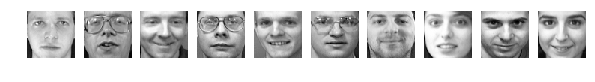

In [3]:
# Here are the first ten guys of the dataset
fig = plt.figure(figsize=(10, 10))
for i in range(10):
    ax = plt.subplot2grid((1, 10), (0, i))
    ax.imshow(faces.data[i * 10].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

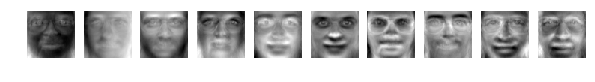

In [5]:
# Let's compute the PCA
pca = PCA()
pca.fit(faces.data)

# Now, the creepy guys are in the components_ attribute.
# Here are the first ten ones:

fig = plt.figure(figsize=(10, 10))
for i in range(10):
    ax = plt.subplot2grid((1, 10), (0, i))
    ax.imshow(pca.components_[i].reshape(64, 64), cmap=plt.cm.gray)
    ax.axis('off')

In [7]:
print(pca.components_.shape)

(400, 4096)


In [ ]:
# Reconstruction process
face = faces.data[0]  # we will reconstruct the first face

# During the reconstruction process we are actually computing, at the kth frame,
# a rank k approximation of the face. To get a rank k approximation of a face,
# we need to first transform it into the 'latent space', and then
# transform it back to the original space

# Step 1: transform the face into the latent space.
# It's now a vector with 400 components. The kth component gives the importance
# of the kth  creepy guy
trans = pca.transform(face.reshape(1, -1))  # Reshape for scikit learn

# Step 2: reconstruction. To build the kth frame, we use all the creepy guys
# up until the kth one.
# Warning: this will save 400 png images.
for k in range(1):
    rank_k_approx = trans[:, :k].dot(pca.components_[:k]) + pca.mean_
    imsave('{:>03}'.format(str(k)) + '.jpg', rank_k_approx.reshape(64, 64))